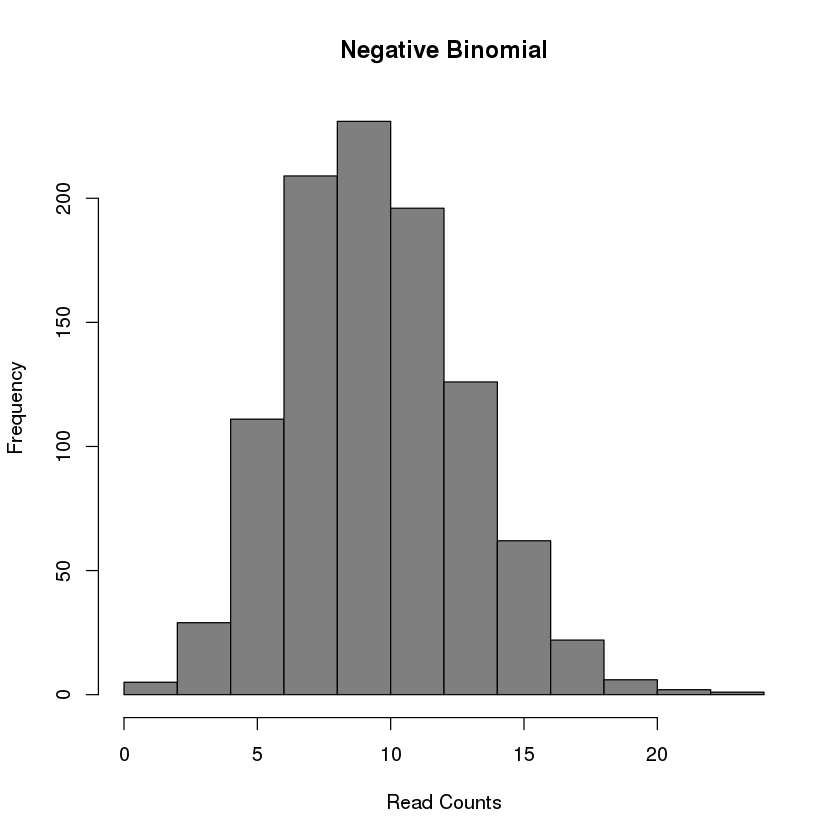

In [1]:
set.seed(1)
hist(
    rnbinom(
        1000,
        mu = 10,
        size = 100),
    col = "grey50",
    xlab = "Read Counts",
    main = "Negative Binomial"
)

# input

In [43]:
class_info_path <- "/home/shibinbin/projects/exSeek-dev/data/exorbase/sample_classes.txt"
mat_path <- "/home/shibinbin/projects/exSeek-dev/output/exorbase/matrix_processing/filter.featurecounts.txt"

In [100]:
class_info <- read.table(class_info_path,header = TRUE)
class_info

sample_id,label
SRR5712482,Healthy
SRR5712483,Healthy
SRR5712484,Healthy
SRR5712485,Healthy
SRR5712486,Healthy
SRR5712487,Healthy
SRR5712488,Healthy
SRR5712489,Healthy
SRR5712490,Healthy
SRR5712491,Healthy


In [45]:
class_info

sample_id,label
SRR5712482,Healthy
SRR5712483,Healthy
SRR5712484,Healthy
SRR5712485,Healthy
SRR5712486,Healthy
SRR5712487,Healthy
SRR5712488,Healthy
SRR5712489,Healthy
SRR5712490,Healthy
SRR5712491,Healthy


In [46]:
mat <- read.table(mat_path,header = TRUE)
dim(mat)

[1] 16514    85

# basic script for normalizing with DESeq2

In [47]:
library(DESeq2)

In [48]:
rownames(class_info) = class_info$sample_id
class_info = class_info[names(mat), ]
rownames(class_info) <- c()
class_info

sample_id,label
SRR5679904,CHD
SRR5679905,CHD
SRR5679906,CHD
SRR5679907,CHD
SRR5679908,CHD
SRR5679909,CHD
SRR5687235,CRC
SRR5687236,CRC
SRR5687237,CRC
SRR5687238,CRC


In [49]:
mat

,SRR5679904,SRR5679905,SRR5679906,SRR5679907,SRR5679908,SRR5679909,SRR5687235,SRR5687236,SRR5687237,SRR5687238,⋯,SRR5714912,SRR5714913,SRR5714914,SRR5714915,SRR5714916,SRR5714917,SRR5714918,SRR5714919,SRR5714920,SRR5714921
ENSG00000238009.6|lncRNA|AL627309.1|ENSG00000238009.6|chr1|89294|120932,1,40,0,8,12,0,8,1,6,0,⋯,0,3,67,0,25,140,0,0,11,6
ENSG00000241860.6|lncRNA|AL627309.5|ENSG00000241860.6|chr1|141473|149707,0,0,33,0,0,0,29,12,40,9,⋯,5,0,9,28,40,0,0,1,18,15
ENSG00000228794.8|lncRNA|LINC01128|ENSG00000228794.8|chr1|825137|849592,81,0,214,45,175,35,29,44,99,91,⋯,24,77,42,32,46,467,92,184,85,120
ENSG00000188976.10|mRNA|NOC2L|ENSG00000188976.10|chr1|944203|947060,771,142,191,231,90,31,122,150,282,269,⋯,163,230,119,56,269,1174,569,659,688,967
ENSG00000187961.13|mRNA|KLHL17|ENSG00000187961.13|chr1|960586|965715,0,0,0,0,0,0,20,10,10,1,⋯,7,2,37,0,0,0,0,10,53,87
ENSG00000187583.10|mRNA|PLEKHN1|ENSG00000187583.10|chr1|966496|975108,0,21,2,11,4,6,2,7,10,7,⋯,2,3,3,0,12,3,3,22,5,51
ENSG00000188290.10|mRNA|HES4|ENSG00000188290.10|chr1|998961|1000172,90,0,15,257,61,38,9,12,25,18,⋯,5,10,2,2,39,20,0,196,139,235
ENSG00000187608.8|mRNA|ISG15|ENSG00000187608.8|chr1|1001137|1014541,1254,93,159,134,541,55,106,105,240,188,⋯,38,239,299,77,225,1112,83,1016,154,153
ENSG00000188157.14|mRNA|AGRN|ENSG00000188157.14|chr1|1020122|1056116,1,0,0,97,29,0,18,3,21,2,⋯,0,4,0,29,8,51,86,435,729,1094
ENSG00000131591.17|mRNA|C1orf159|ENSG00000131591.17|chr1|1081817|1116081,0,0,0,1,16,153,8,12,13,11,⋯,0,0,0,6,25,10,0,10,46,85


In [51]:
dds <- DESeqDataSetFromMatrix(mat, class_info,~label, tidy=FALSE)

## cannot use normlised data
[link](https://support.bioconductor.org/p/82377/)

In [41]:
countData <- matrix(1:100+0.1,ncol=4)
condition <- factor(c("A","A","B","B"))
dds <- DESeqDataSetFromMatrix(countData, DataFrame(condition), ~ condition)

ERROR: Error in DESeqDataSet(se, design = design, ignoreRank): some values in assay are not integers


In [42]:
countData

1.1,26.1,51.1,76.1
2.1,27.1,52.1,77.1
3.1,28.1,53.1,78.1
4.1,29.1,54.1,79.1
5.1,30.1,55.1,80.1
6.1,31.1,56.1,81.1
7.1,32.1,57.1,82.1
8.1,33.1,58.1,83.1
9.1,34.1,59.1,84.1
10.1,35.1,60.1,85.1
11.1,36.1,61.1,86.1


## normlize using rlog mathod

In [52]:
norm <- rlog(dds,blind=FALSE)
norm_matrix <- assay(norm)
norm_df <- data.frame(Gene=rownames(norm_matrix), norm_matrix)

In [54]:
dim(norm_df)

[1] 16514    86

In [55]:
deg <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 30 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [56]:
deg

class: DESeqDataSet 
dim: 16514 85 
metadata(1): version
assays(5): counts mu cooks replaceCounts replaceCooks
rownames(16514):
  ENSG00000238009.6|lncRNA|AL627309.1|ENSG00000238009.6|chr1|89294|120932
  ENSG00000241860.6|lncRNA|AL627309.5|ENSG00000241860.6|chr1|141473|149707
  ...
  hsa_circ_0140609|circRNA|hsa_circ_0140609|hsa_circ_0140609|hsa_circ_0140609|0|600
  hsa_circ_0140676|circRNA|hsa_circ_0140676|hsa_circ_0140676|hsa_circ_0140676|0|600
rowData names(34): baseMean baseVar ... maxCooks replace
colnames(85): SRR5679904 SRR5679905 ... SRR5714920 SRR5714921
colData names(4): sample_id label sizeFactor replaceable

In [57]:
res <- results(deg,tidy=TRUE)

In [61]:
DESeq

function (object, test = c("Wald", "LRT"), fitType = c("parametric", 
    "local", "mean"), betaPrior, full = design(object), reduced, 
    quiet = FALSE, minReplicatesForReplace = 7, modelMatrixType, 
    parallel = FALSE, BPPARAM = bpparam()) 
{
    stopifnot(is(object, "DESeqDataSet"))
    test <- match.arg(test, choices = c("Wald", "LRT"))
    fitType <- match.arg(fitType, choices = c("parametric", "local", 
        "mean"))
    stopifnot(is.logical(quiet))
    stopifnot(is.numeric(minReplicatesForReplace))
    stopifnot(is.logical(parallel))
    modelAsFormula <- !is.matrix(full)
    if (missing(betaPrior)) {
        betaPrior <- FALSE
    }
    else {
        stopifnot(is.logical(betaPrior))
    }
    object <- sanitizeRowRanges(object)
    if (test == "LRT") {
        if (missing(reduced)) {
            stop("likelihood ratio test requires a 'reduced' design, see ?DESeq")
        }
        if (betaPrior) {
            stop("test='LRT' does not support use of LFC shrinkage, use betaPrior=FALSE")
        }
        if (!missing(modelMatrixType) && modelMatrixType == "expanded") {
            stop("test='LRT' does not support use of expanded model matrix")
        }
        if (is.matrix(full) | is.matrix(reduced)) {
            if (!(is.matrix(full) & is.matrix(reduced))) {
                stop("if one of 'full' and 'reduced' is a matrix, the other must be also a matrix")
            }
        }
        if (modelAsFormula) {
            checkLRT(full, reduced)
        }
        else {
            checkFullRank(full)
            checkFullRank(reduced)
            if (ncol(full) <= ncol(reduced)) {
                stop("the number of columns of 'full' should be more than the number of columns of 'reduced'")
            }
        }
    }
    if (test == "Wald" & !missing(reduced)) {
        stop("'reduced' ignored when test='Wald'")
    }
    if (modelAsFormula) {
        designAndArgChecker(object, betaPrior)
        if (design(object) == formula(~1)) {
            warning("the design is ~ 1 (just an intercept). is this intended?")
        }
        if (full != design(object)) {
            stop("'full' specified as formula should equal design(object)")
        }
        modelMatrix <- NULL
    }
    else {
        if (betaPrior == TRUE) {
            stop("betaPrior=TRUE is not supported for user-provided model matrices")
        }
        checkFullRank(full)
        modelMatrix <- full
    }
    attr(object, "betaPrior") <- betaPrior
    stopifnot(length(parallel) == 1 & is.logical(parallel))
    if (!is.null(sizeFactors(object)) || !is.null(normalizationFactors(object))) {
        if (!quiet) {
            if (!is.null(normalizationFactors(object))) {
                message("using pre-existing normalization factors")
            }
            else {
                message("using pre-existing size factors")
            }
        }
    }
    else {
        if (!quiet) 
            message("estimating size factors")
        object <- estimateSizeFactors(object)
    }
    if (!parallel) {
        if (!quiet) 
            message("estimating dispersions")
        object <- estimateDispersions(object, fitType = fitType, 
            quiet = quiet, modelMatrix = modelMatrix)
        if (!quiet) 
            message("fitting model and testing")
        if (test == "Wald") {
            object <- nbinomWaldTest(object, betaPrior = betaPrior, 
                quiet = quiet, modelMatrix = modelMatrix, modelMatrixType = modelMatrixType)
        }
        else if (test == "LRT") {
            object <- nbinomLRT(object, full = full, reduced = reduced, 
                quiet = quiet)
        }
    }
    else if (parallel) {
        object <- DESeqParallel(object, test = test, fitType = fitType, 
            betaPrior = betaPrior, full = full, reduced = reduced, 
            quiet = quiet, modelMatrix = modelMatrix, modelMatrixType = modelMatrixType, 
            BPPARAM = BPPARAM)
    }
    sufficientReps <- any(nOrMoreInCell(attr(ob

In [58]:
res

row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000238009.6|lncRNA|AL627309.1|ENSG00000238009.6|chr1|89294|120932,8.131151,0.65401931,1.1833119,0.5527024,0.5804672132,0.734584974
ENSG00000241860.6|lncRNA|AL627309.5|ENSG00000241860.6|chr1|141473|149707,13.077959,0.53088342,1.0041781,0.5286746,0.5970312184,0.747591926
ENSG00000228794.8|lncRNA|LINC01128|ENSG00000228794.8|chr1|825137|849592,88.114119,-0.45059998,0.4618096,-0.9757268,0.3291998560,0.516125838
ENSG00000188976.10|mRNA|NOC2L|ENSG00000188976.10|chr1|944203|947060,254.024188,0.54211310,0.3104684,1.7461134,0.0807912501,0.199035877
ENSG00000187961.13|mRNA|KLHL17|ENSG00000187961.13|chr1|960586|965715,7.681035,6.07030604,1.6006093,3.7924971,0.0001491400,0.002180430
ENSG00000187583.10|mRNA|PLEKHN1|ENSG00000187583.10|chr1|966496|975108,14.208920,-0.32747534,1.2737393,-0.2570976,0.7971034230,0.885747429
ENSG00000188290.10|mRNA|HES4|ENSG00000188290.10|chr1|998961|1000172,29.313672,-0.97701989,0.6263414,-1.5598838,0.1187873390,0.260662566
ENSG00000187608.8|mRNA|ISG15|ENSG00000187608.8|chr1|1001137|1014541,255.221603,-0.05968626,0.4477349,-0.1333071,0.8939504774,0.942786185
ENSG00000188157.14|mRNA|AGRN|ENSG00000188157.14|chr1|1020122|1056116,34.100442,2.74470500,1.1259432,2.4376940,0.0147812810,0.060736825
ENSG00000131591.17|mRNA|C1orf159|ENSG00000131591.17|chr1|1081817|1116081,16.007811,-2.20225035,1.1161009,-1.9731642,0.0484768566,0.139643804


In [120]:
resultsNames(deg)

[1] "Intercept"            "label_CRC_vs_CHD"     "label_HCC_vs_CHD"    
[4] "label_Healthy_vs_CHD" "label_PAAD_vs_CHD"

In [ ]:
write.table(merged_res,file="hcc_example.miRNA.NCvsHCC.DESeq2.tsv",sep="\t",row.names=FALSE)

In [59]:
norm_df

,Gene,SRR5679904,SRR5679905,SRR5679906,SRR5679907,SRR5679908,SRR5679909,SRR5687235,SRR5687236,SRR5687237,⋯,SRR5714912,SRR5714913,SRR5714914,SRR5714915,SRR5714916,SRR5714917,SRR5714918,SRR5714919,SRR5714920,SRR5714921
ENSG00000238009.6|lncRNA|AL627309.1|ENSG00000238009.6|chr1|89294|120932,ENSG00000238009.6|lncRNA|AL627309.1|ENSG00000238009.6|chr1|89294|120932,2.298607,3.340126,2.267737,2.605487,2.789609,2.279661,2.822753,2.346306,2.529557,⋯,2.281172,2.391422,3.619910,2.270941,2.847107,3.542896,2.259536,2.261240,2.670876,2.488274
ENSG00000241860.6|lncRNA|AL627309.5|ENSG00000241860.6|chr1|141473|149707,ENSG00000241860.6|lncRNA|AL627309.5|ENSG00000241860.6|chr1|141473|149707,2.852852,2.860364,3.898990,2.859601,2.863196,2.881880,4.145348,3.504010,3.925176,⋯,3.308689,2.856549,3.224492,3.913405,3.678642,2.845798,2.849556,2.889439,3.460539,3.343845
ENSG00000228794.8|lncRNA|LINC01128|ENSG00000228794.8|chr1|825137|849592,ENSG00000228794.8|lncRNA|LINC01128|ENSG00000228794.8|chr1|825137|849592,5.997479,4.378129,7.316257,5.820670,7.134522,6.205106,5.991052,6.126651,6.451898,⋯,5.952627,6.126113,5.724368,5.814407,5.512499,7.050447,5.918271,6.671525,6.247609,6.449065
ENSG00000188976.10|mRNA|NOC2L|ENSG00000188976.10|chr1|944203|947060,ENSG00000188976.10|mRNA|NOC2L|ENSG00000188976.10|chr1|944203|947060,8.753004,7.396978,7.797350,7.851571,7.073813,6.653891,7.870340,7.830845,8.042123,⋯,8.316702,7.696308,7.134182,6.803482,7.550355,8.599401,8.182244,8.545620,8.909509,9.163991
ENSG00000187961.13|mRNA|KLHL17|ENSG00000187961.13|chr1|960586|965715,ENSG00000187961.13|mRNA|KLHL17|ENSG00000187961.13|chr1|960586|965715,2.198902,2.203278,2.204704,2.202832,2.204933,2.215936,3.219086,2.750938,2.601787,⋯,2.755948,2.287693,3.169930,2.207720,2.198081,2.194817,2.196991,2.497146,3.368947,3.638465
ENSG00000187583.10|mRNA|PLEKHN1|ENSG00000187583.10|chr1|966496|975108,ENSG00000187583.10|mRNA|PLEKHN1|ENSG00000187583.10|chr1|966496|975108,2.303842,3.142918,2.462058,2.846186,2.587431,2.888423,2.551798,2.827863,2.805430,⋯,2.580420,2.475623,2.489857,2.322227,2.721920,2.381471,2.415789,2.971744,2.579519,3.474205
ENSG00000188290.10|mRNA|HES4|ENSG00000188290.10|chr1|998961|1000172,ENSG00000188290.10|mRNA|HES4|ENSG00000188290.10|chr1|998961|1000172,5.135717,3.630783,4.329942,6.349533,5.224023,5.301707,4.336597,4.355643,4.515674,⋯,4.151721,4.048168,3.738809,3.802660,4.522468,4.014605,3.604682,5.740489,5.692486,6.062435
ENSG00000187608.8|mRNA|ISG15|ENSG00000187608.8|chr1|1001137|1014541,ENSG00000187608.8|mRNA|ISG15|ENSG00000187608.8|chr1|1001137|1014541,9.251182,6.929409,7.556991,7.248384,8.881248,7.102661,7.673461,7.415773,7.823414,⋯,6.815001,7.682254,8.006230,7.032075,7.315921,8.495639,6.273218,8.978524,7.286194,7.170360
ENSG00000188157.14|mRNA|AGRN|ENSG00000188157.14|chr1|1020122|1056116,ENSG00000188157.14|mRNA|AGRN|ENSG00000188157.14|chr1|1020122|1056116,2.767969,2.715137,2.728680,5.531990,4.416187,2.824120,4.426068,3.198919,4.023682,⋯,2.835048,3.080074,2.703374,4.568454,3.212658,4.017807,4.748739,8.169704,10.865598,12.500628
ENSG00000131591.17|mRNA|C1orf159|ENSG00000131591.17|chr1|1081817|1116081,ENSG00000131591.17|mRNA|C1orf159|ENSG00000131591.17|chr1|1081817|1116081,2.781682,2.791678,2.794898,2.851944,3.513626,4.568775,3.422855,3.497483,3.349397,⋯,2.822738,2.786617,2.788938,3.196067,3.445013,3.003496,2.777259,3.131979,3.958222,4.277736


In [60]:
merged_res <- merge(norm_df,res,by.x="Gene",by.y="row")
merged_res

Gene,SRR5679904,SRR5679905,SRR5679906,SRR5679907,SRR5679908,SRR5679909,SRR5687235,SRR5687236,SRR5687237,⋯,SRR5714918,SRR5714919,SRR5714920,SRR5714921,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003.14|mRNA|TSPAN6|ENSG00000000003.14|chrX|100627108|100637104,4.020665,5.063129,3.222821,4.348744,3.906478,4.683381,3.269424,3.691043,3.698371,⋯,5.005871,4.803946,5.607822,5.922330,30.074253,1.007592503,0.9336969,1.07914297,0.280523996,0.46414686
ENSG00000000005.5|mRNA|TNMD|ENSG00000000005.5|chrX|100584801|100599885,2.107030,2.062092,2.015188,2.013831,2.210028,2.023386,2.022058,2.018440,2.059502,⋯,2.686929,2.352457,2.558641,2.050282,6.025230,2.860813697,1.4434893,1.98187382,0.047493365,0.13760321
ENSG00000000419.12|mRNA|DPM1|ENSG00000000419.12|chr20|50934866|50958550,7.377862,8.584060,6.553034,6.917921,6.938319,8.148120,7.128015,7.112397,6.756732,⋯,7.165164,7.096511,7.507536,7.819909,146.093513,-0.802662858,0.2805469,-2.86106524,0.004222202,0.02441039
ENSG00000000457.13|mRNA|SCYL3|ENSG00000000457.13|chr1|169849630|169893952,7.622961,8.811648,7.002210,7.916038,7.069450,4.793028,7.250042,7.410847,7.488157,⋯,7.144234,7.351405,6.912251,7.116874,162.140843,-0.728446213,0.3562771,-2.04460594,0.040893724,0.12469828
ENSG00000000460.16|mRNA|C1orf112|ENSG00000000460.16|chr1|169662006|169853085,6.749948,4.885550,6.854833,7.859621,6.528061,7.515699,7.630721,6.198986,7.280022,⋯,7.678027,5.983983,7.513280,7.662472,170.269061,0.677623049,0.5809726,1.16635977,0.243469018,0.42248734
ENSG00000000938.12|mRNA|FGR|ENSG00000000938.12|chr1|27612063|27635277,10.478944,10.101297,10.103332,9.721557,10.466396,10.358665,10.571522,10.107943,10.457606,⋯,10.240279,10.416946,9.299681,7.944481,1133.493350,-0.363353859,0.2318705,-1.56705503,0.117101828,0.25823025
ENSG00000000971.15|mRNA|CFH|ENSG00000000971.15|chr1|196651877|196747504,6.522905,7.185556,6.114293,4.258594,6.985878,8.840435,4.832354,6.204516,5.073774,⋯,7.299536,5.351333,6.896591,6.727419,150.396236,-1.448397416,0.7033090,-2.05940400,0.039455553,0.12163866
ENSG00000001036.13|mRNA|FUCA2|ENSG00000001036.13|chr6|143494810|143511690,6.181227,8.092050,5.967123,7.373536,5.043481,5.545198,6.700086,6.680983,6.300221,⋯,7.169254,5.954296,7.637203,7.822503,99.496269,-0.049231617,0.4954090,-0.09937569,0.920839982,0.95858885
ENSG00000001084.10|mRNA|GCLC|ENSG00000001084.10|chr6|53497340|53510448,8.405609,8.628684,8.772684,9.003923,7.843737,8.448783,7.695343,8.382742,9.123087,⋯,9.050322,7.738145,8.902262,8.465186,376.987202,-0.452886651,0.3394986,-1.33398673,0.182208205,0.34921931
ENSG00000001167.14|mRNA|NFYA|ENSG00000001167.14|chr6|41072944|41099976,8.392426,9.523350,8.529144,8.685656,9.170061,8.111083,8.436305,8.577158,8.626480,⋯,9.041985,8.651553,8.856986,8.486721,421.704291,-0.288210192,0.1950427,-1.47767727,0.139494182,0.29053643


# [Standard workflow](https://bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html)

In [70]:
install.packages("apeglm")

Installing package into ‘/home/xieyufeng/R/x86_64-redhat-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Warning message:
“package ‘apeglm’ is not available (for R version 3.4.3)”

In [62]:
dds <- DESeqDataSetFromMatrix(countData = mat,
                              colData = class_info,
                              design = ~label)

In [63]:
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 30 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [64]:
resultsNames(dds) # lists the coefficients

[1] "Intercept"            "label_CRC_vs_CHD"     "label_HCC_vs_CHD"    
[4] "label_Healthy_vs_CHD" "label_PAAD_vs_CHD"

In [83]:
length(resultsNames(dds))

[1] 5

In [66]:
res <- results(dds, name="label_CRC_vs_CHD")

In [67]:
res

log2 fold change (MLE): label CRC vs CHD 
Wald test p-value: label CRC vs CHD 
DataFrame with 16514 rows and 6 columns
                                                                                    baseMean
                                                                                   <numeric>
ENSG00000238009.6|lncRNA|AL627309.1|ENSG00000238009.6|chr1|89294|120932             8.131151
ENSG00000241860.6|lncRNA|AL627309.5|ENSG00000241860.6|chr1|141473|149707           13.077959
ENSG00000228794.8|lncRNA|LINC01128|ENSG00000228794.8|chr1|825137|849592            88.114119
ENSG00000188976.10|mRNA|NOC2L|ENSG00000188976.10|chr1|944203|947060               254.024188
ENSG00000187961.13|mRNA|KLHL17|ENSG00000187961.13|chr1|960586|965715                7.681035
...                                                                                      ...
hsa_circ_0139808|circRNA|hsa_circ_0139808|hsa_circ_0139808|hsa_circ_0139808|0|564  28.201875
hsa_circ_0140317|circRNA|hsa_circ_0140317|hs

In [75]:
idx <- identify(res$baseMean, res$log2FoldChange)
idx

ERROR: Error in identify.default(res$baseMean, res$log2FoldChange): plot.new has not been called yet


In [71]:
resLFC <- lfcShrink(dds, coef="label_CRC_vs_CHD", type="apeglm")

ERROR: Error in lfcShrink(dds, coef = "label_CRC_vs_CHD", type = "apeglm"): type='apeglm' requires installing the Bioconductor package 'apeglm'


In [72]:
install.packages("apeglm")

Installing package into ‘/home/xieyufeng/R/x86_64-redhat-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Warning message:
“package ‘apeglm’ is not available (for R version 3.4.3)”

## lfcShrink

In [76]:
resNorm <- lfcShrink(dds, coef="label_CRC_vs_CHD", type="normal")

In [79]:
resAsh <- lfcShrink(dds, coef="label_CRC_vs_CHD", type="ashr")

ERROR: Error in lfcShrink(dds, coef = "label_CRC_vs_CHD", type = "ashr"): type='ashr' requires installing the CRAN package 'ashr'


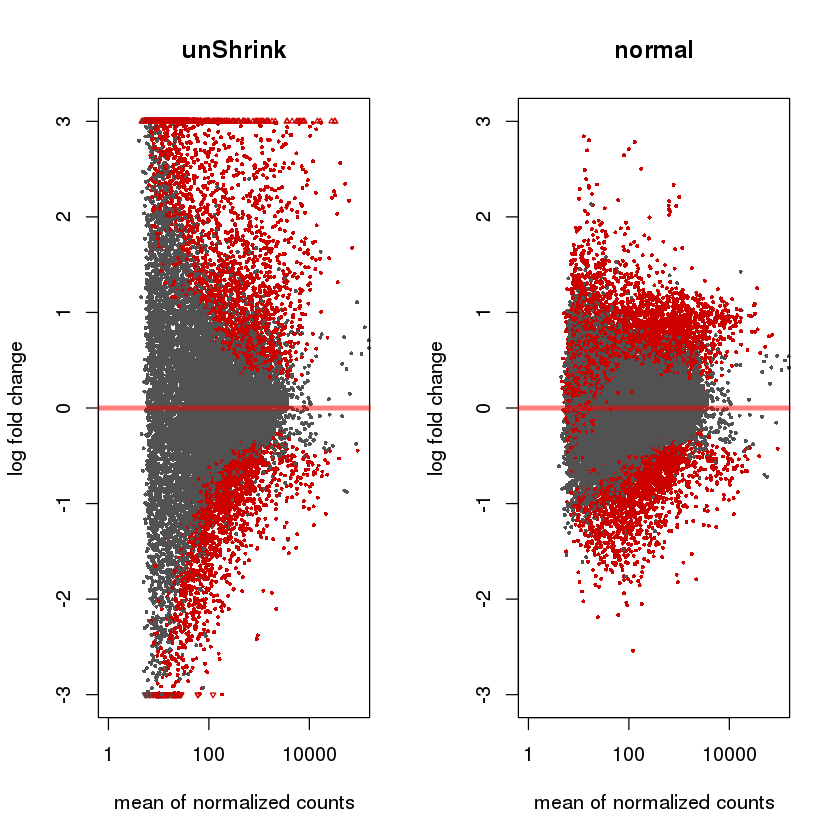

In [78]:
par(mfrow=c(1,2))
xlim <- c(1,1e5); ylim <- c(-3,3)
plotMA(res, xlim=xlim, ylim=ylim, main="unShrink")
plotMA(resNorm, xlim=xlim, ylim=ylim, main="normal")

## order our results

In [80]:
resOrdered <- res[order(res$pvalue),]

In [81]:
write.csv(as.data.frame(resOrdered), 
          file="diff_exp/condition_treated_results.csv")

# other data

In [147]:
class_info_path <- "/home/shibinbin/projects/exSeek-dev/data/scirep/sample_classes.txt"
mat_path <- "/home/shibinbin/projects/exSeek-dev/output/scirep/matrix_processing/filter.featurecounts.txt"

In [150]:
class_info <- read.table(class_info_path,header = TRUE,sep='\t')

In [151]:
class_info

sample_id,label
Sample_1S3,Colorectal Cancer
Sample_1S6,Colorectal Cancer
Sample_1S9,Colorectal Cancer
Sample_1S12,Colorectal Cancer
Sample_1S15,Colorectal Cancer
Sample_1S18,Colorectal Cancer
Sample_1S21,Colorectal Cancer
Sample_1S24,Colorectal Cancer
Sample_4S2,Colorectal Cancer
Sample_4S5,Colorectal Cancer


In [161]:
grep(pattern="Healthy",class_info[,2])

[1]  17  18  19  20  21  22  23  24  41  42  43  44  45  46  47  48  57  58  59
[20]  60  61  62  63  64  81  82  83  84  85  86  87  88 105 106 107 108 109 110
[39] 111 112 130 131 132 133 134 135 136 137 162 187

In [178]:
class_info[grep(pattern="Healthy",class_info[,2])[1],]$label

[1] Healthy Control
4 Levels: Colorectal Cancer Healthy Control ... Prostate Cancer

In [172]:
a = class_info[grep(pattern="Healthy",class_info[,2]),]$label[1]

In [179]:
a == "Healthy Control"

[1] TRUE

# function

input matrix and class,output several csv files 

## prepare

In [183]:
class_info_path <- "/home/shibinbin/projects/exSeek-dev/data/exorbase/sample_classes.txt"
mat_path <- "/home/shibinbin/projects/exSeek-dev/output/exorbase/matrix_processing/filter.featurecounts.txt"

## function

In [263]:
diff_exp <- function(class_info_path = ".", mat_path = ".", ptop=10, out_path='.') {
    library(DESeq2)
    library("BiocParallel")
    register(MulticoreParam(4))
    #read
    class_info <- read.table(class_info_path, header = TRUE)
    mat <- read.table(mat_path, header = TRUE)
    #order
    mat = mat[,class_info$sample_id]
    #rownames(class_info) = class_info$sample_id
    #class_info = class_info[names(mat), ]
    #rownames(class_info) <- c()
    normal = as.matrix(class_info)[grep(pattern="Healthy",as.matrix(class_info)[,2]),][,'label'][1]
    dds <- DESeqDataSetFromMatrix(countData = mat,
                                  colData = class_info,
                                  design = ~label
                                  )
    dds <- DESeq(dds)
    #class_n = length(levels(class_info$label)[levels(class_info$label)!="Healthy"])-1
    for(i in levels(class_info$label)[levels(class_info$label)!=normal]){
        res <- results(dds, contrast=c("label", normal, i))
        resOrdered <- res[order(res$padj),]
        resOrdered_top <- resOrdered[seq_len(ptop),]
        write.csv(as.data.frame(resOrdered_top), 
                  file=paste(out_path,normal,".",i,'.csv',sep=''))
    }
}

## test

In [185]:
class_info <- read.table(class_info_path, header = TRUE)
    mat <- read.table(mat_path, header = TRUE)
    #order
    mat = mat[,class_info$sample_id]

In [187]:
dds <- DESeqDataSetFromMatrix(countData = mat,
                                  colData = class_info,
                                  design = ~label
                                  )
    dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 30 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


In [214]:
array(class_info[grep(pattern="Healthy",class_info[,2])[1],]$label)

[1] "character"

In [216]:
typeof(array(normal))

[1] "character"

In [201]:
normal

[1] Healthy
Levels: CHD CRC HCC Healthy PAAD

In [188]:
levels(class_info$label)[levels(class_info$label)!=normal]

[1] "CHD"  "CRC"  "HCC"  "PAAD"

In [227]:
normal <- array(class_info[grep(pattern="Healthy",class_info[,2]),]$label[1])
    dds <- DESeqDataSetFromMatrix(countData = mat,
                                  colData = class_info,
                                  design = ~label
                                  )
    dds <- DESeq(dds)
    #class_n = length(levels(class_info$label)[levels(class_info$label)!="Healthy"])-1
    for(i in levels(class_info$label)[levels(class_info$label)!=normal]){
        res <- results(dds, contrast=c("label", normal, i))
        resOrdered <- res[order(res$padj),]
        resOrdered_top <- resOrdered[seq_len(ptop),]
        write.csv(as.data.frame(resOrdered_top), 
                  file=paste(out_path,normal,".",i,'.csv',sep=''))
    }

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 30 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


ERROR: Error in eval(expr, envir, enclos): dims [product 1] do not match the length of object [5]


In [255]:
class_info = as.matrix(class_info)

In [261]:
normal = class_info[grep(pattern="Healthy",class_info[,2]),][,'label'][1]

In [262]:
levels(class_info$label)[levels(class_info$label)!=normal]

ERROR: Error in class_info$label: $ operator is invalid for atomic vectors


In [244]:
typeof("adsad")

[1] "character"

In [245]:
b ='das'

In [246]:
levels(class_info$label)==b

[1] FALSE FALSE FALSE FALSE FALSE

In [234]:
levels(class_info$label)[levels(class_info$label)!="Healthy"]

[1] "CHD"  "CRC"  "HCC"  "PAAD"

In [ ]:
ptop=10
out_path='diff_exp/'

## Run

In [226]:
diff_exp(class_info_path = class_info_path,mat_path = mat_path, out_path = 'diff_exp/')

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 30 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


ERROR: Error in diff_exp(class_info_path = class_info_path, mat_path = mat_path, : dims [product 1] do not match the length of object [5]


In [144]:
levels(class_info$label)[levels(class_info$label)!="Healthy"]

[1] "CHD"  "CRC"  "HCC"  "PAAD"

In [132]:
results(dds, contrast=c("label","Healthy","HCC"))

log2 fold change (MLE): label Healthy vs HCC 
Wald test p-value: label Healthy vs HCC 
DataFrame with 16514 rows and 6 columns
                                                                                    baseMean
                                                                                   <numeric>
ENSG00000238009.6|lncRNA|AL627309.1|ENSG00000238009.6|chr1|89294|120932             8.131151
ENSG00000241860.6|lncRNA|AL627309.5|ENSG00000241860.6|chr1|141473|149707           13.077959
ENSG00000228794.8|lncRNA|LINC01128|ENSG00000228794.8|chr1|825137|849592            88.114119
ENSG00000188976.10|mRNA|NOC2L|ENSG00000188976.10|chr1|944203|947060               254.024188
ENSG00000187961.13|mRNA|KLHL17|ENSG00000187961.13|chr1|960586|965715                7.681035
...                                                                                      ...
hsa_circ_0139808|circRNA|hsa_circ_0139808|hsa_circ_0139808|hsa_circ_0139808|0|564  28.201875
hsa_circ_0140317|circRNA|hsa_circ_01

this function lfc unShrink

raw mat as input

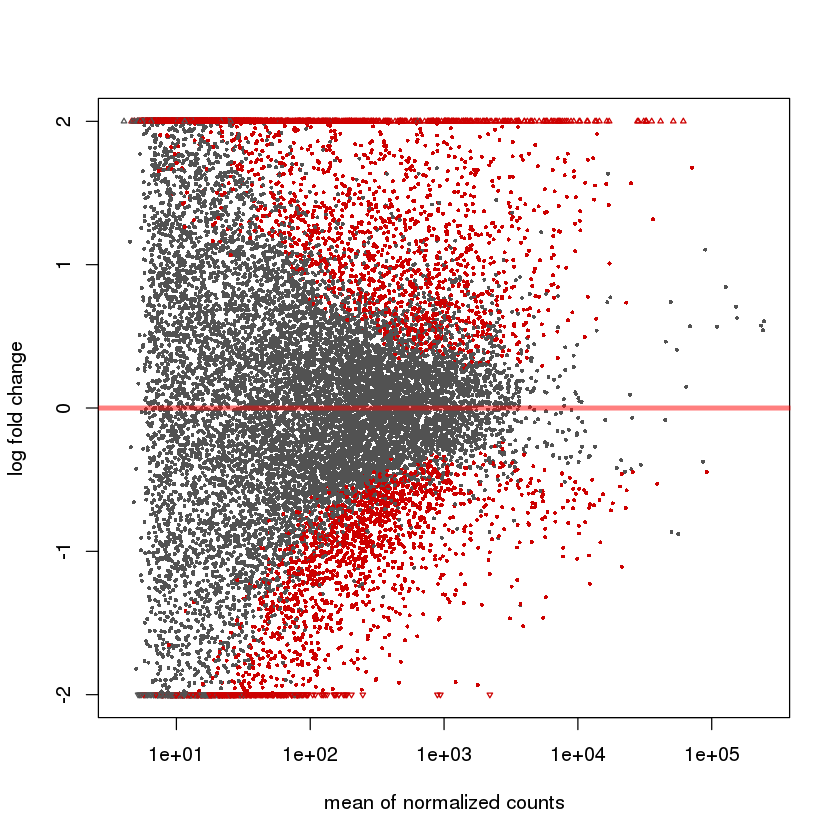

In [73]:
plotMA(res, ylim=c(-2,2))

# run on two dataset

In [264]:
class_info_path <- "/home/shibinbin/projects/exSeek-dev/data/exorbase/sample_classes.txt"
mat_path <- "/home/shibinbin/projects/exSeek-dev/output/exorbase/matrix_processing/filter.featurecounts.txt"

In [271]:
diff_exp <- function(class_info_path = ".", mat_path = ".", ptop=10, out_path='.') {
    library(DESeq2)
    library("BiocParallel")
    register(MulticoreParam(4))
    #read
    class_info <- read.table(class_info_path, header = TRUE,sep='\t')
    mat <- read.table(mat_path, header = TRUE)
    #order
    mat = mat[,class_info$sample_id]
    #rownames(class_info) = class_info$sample_id
    #class_info = class_info[names(mat), ]
    #rownames(class_info) <- c()
    #normal <- array(class_info[grep(pattern="Healthy",class_info[,2]),]$label[1])
    normal = as.matrix(class_info)[grep(pattern="Healthy",as.matrix(class_info)[,2]),][,'label'][1]
    dds <- DESeqDataSetFromMatrix(countData = mat,
                                  colData = class_info,
                                  design = ~label
                                  )
    dds <- DESeq(dds)
    #class_n = length(levels(class_info$label)[levels(class_info$label)!="Healthy"])-1
    for(i in levels(class_info$label)[levels(class_info$label)!=normal]){
        res <- results(dds, contrast=c("label", normal, i))
        resOrdered <- res[order(res$padj),]
        resOrdered_top <- resOrdered[seq_len(ptop),]
        write.table(as.data.frame(resOrdered_top), 
                  file=paste(out_path,normal,".",i,'.txt',sep=''),sep='\t')
    }
}

In [ ]:
diff_exp(class_info_path = class_info_path,mat_path = mat_path, out_path = 'diff_exp/')

In [267]:
class_info_path <- "/home/shibinbin/projects/exSeek-dev/data/scirep/sample_classes.txt"
mat_path <- "/home/shibinbin/projects/exSeek-dev/output/scirep/matrix_processing/filter.domains_combined.txt"

In [270]:
diff_exp(class_info_path = class_info_path,mat_path = mat_path, out_path = 'diff_exp/')

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
estimating size factors
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]